In [1]:
from preamble import *

C:\Users\student\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# 샘플링의 개수가 서로 비등비등하지 않고, 암O 데이터가 암X보다 훨씬 많다
# 그래서 층화추출(stratify) 옵션을 켜준다.

tree = DecisionTreeClassifier(random_state=0) # 트리객체 생성
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))  # 모형의 피팅률 체크
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))  # 모형의 정확도 체크

# 훈련세트 정확도: 100%? 오퍼피팅 가능성 매우 높다

# 불순도 0 만들어야 한다?
# 1) 리프노트가 가질 수 있는 개수 제한
# 2) depth지정 (나눠지는 횟수)

# 사전가지치기?

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [3]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0) # 트리객체 생성
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))  # 모형의 피팅률 체크
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))  # 모형의 정확도 체크

# 피팅률 낮아졌으나 accuracy가 올라갔다.

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [4]:
tree
# 옵션이 쫙 나온다.
# 오버피팅관련:
 # max_depth, max_features, max_leaf_nodes,
 #impurity: 불순도
 # min_samples_leaf: 한 리프에 들어가는 최소 데이터 개수

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [12]:
from sklearn.tree import export_graphviz   # 파일로 내보내는 툴은 sklearn에 내장돼있다.
export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [ ]:
# tree.dot을 실질적인 코드를 돌려서 그래프로 읽으려면 툴 따로 설치(graphviz)
 # graphviz 파일 설치 / 경로설정(bin폴더 주소복사 - 제어판 시스템 환경변수에 추가 - pip install graphviz - 콘솔,웹창 끄고 다시시작)
 # anaconda로 pip install
 # python에서 코드 작성

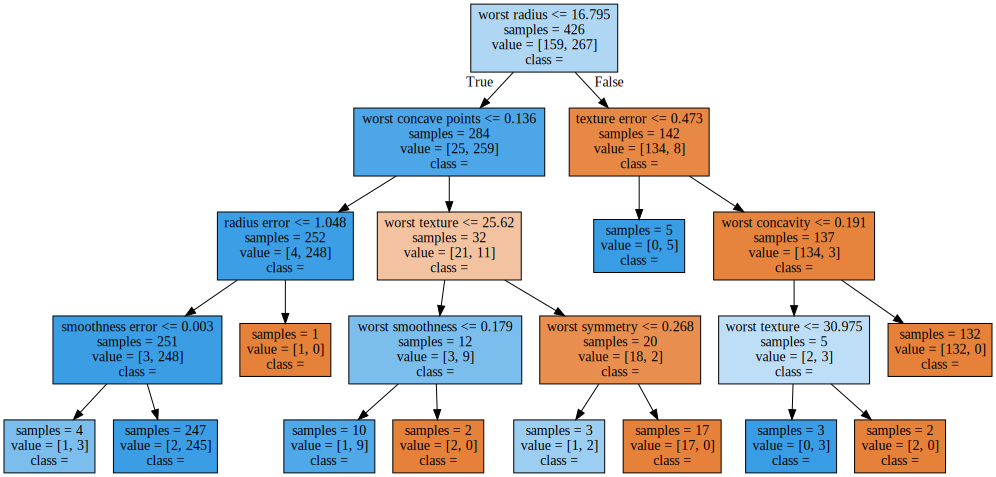

In [8]:
import graphviz

with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

# depth가 4만 되어도 보기 힘들고 overfitting 일어날 확률도 있다.

In [9]:
# 변수중요도 제시
tree.feature_importances_

# 0: 전혀 사용되지 않음
# 높아질수록 사용됨

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.01 , 0.048, 0.   , 0.   , 0.002, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.046, 0.   , 0.   , 0.014, 0.   , 0.018,
       0.122, 0.012, 0.   ])

In [10]:
# 데이터셋에 대한 설명
cancer["DESCR"]

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

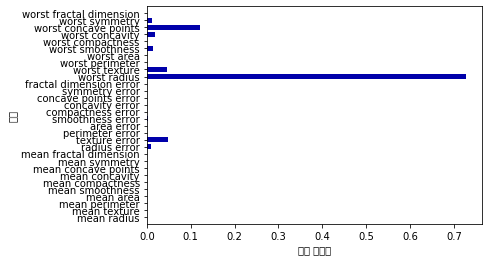

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')  # barh: 수평바(horizon)
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)  # matplotlibrary plot정보에서 한글정보 추가해라

# 중요도
# 정확도가 좋은 내용 아니라서 이런 것들을 각기 다른 데이터, feature를 가지고 반복수행하면서 계속 봐봐라 (랜덤포레스트처럼)

,Unnamed: 0,date,price
0,0,1957.00,4.11e+08
1,1,1959.00,6.79e+07
2,2,1960.00,5.24e+06
3,3,1965.00,2.64e+06
4,4,1970.00,7.34e+05
...,...,...,...
328,328,2015.58,4.50e-03
329,329,2015.67,4.30e-03
330,330,2015.75,4.20e-03
331,331,2015.83,3.80e-03


C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 45380 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44201 mis

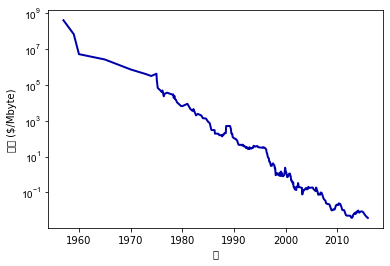

In [15]:
import os
import mglearn
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price) # semilogy: y값에 로그를 취하라 # 굴곡이 완화된다. 가격차가 아니라 추세만 보는 것이므로
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

ram_prices

In [ ]:
# 결정트리는 수치예측을 할 때 특히 문제점이 드러난다. 